In [83]:
#Dependencies
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from config import api

In [84]:
#Video title list
video_title = ["Party in the USA(2009)", "When I look at you(2010)", "Who owns my heart(2010)", "Can't be tamed(2010)", "Wrecking ball(2013)", "Adore you(2013)", "Malibu(2017)", "Younger now(2017)"]

#Build base url
url = "https://www.googleapis.com/youtube/v3/videos?"
#  Party in the USA, When I look at you, Who owns my heart, Can't be tamed, Wrecking ball, Adore you, Malibu, Younger now
video_id = ["M11SvDtPBhA", "8wxOVn99FTE", "iVbQxC2c3-8", "sjSG6z_13-Q", "My2FRPA3Gf8", "W1tzURKYFNs", "8j9zMok6two", "-LX2kpeyp80"]
view_count_list = []

#Gather data json in a list for videos
for video in video_id:
    response = requests.get(url + "&part=statistics" + "&id=" + video + "&key=" + api)
    response_json = response.json()
    view_count_list.append(response_json)
    
    


In [85]:
#Create lists for view counts, likes, dislikes and comments
view_count = []
like_count = []
dislike_count = []
comment_count = []

#Loop through the video json list to get and append corresponding data to the lists
for view in view_count_list:
    view_count.append(int(view["items"][0]["statistics"]["viewCount"]))
    like_count.append(int(view["items"][0]["statistics"]["likeCount"]))
    dislike_count.append(int(view["items"][0]["statistics"]["dislikeCount"]))
    comment_count.append(int(view["items"][0]["statistics"]["commentCount"]))

#Create dataframe with collected data
view_count_df = pd.DataFrame(video_title, columns = ["Video Title"])
view_count_df["View Count"] = view_count
view_count_df["Like Count"] = like_count
view_count_df["Dislike Count"] = dislike_count
view_count_df["Comment Count"] = comment_count
view_count_df


,Video Title,View Count,Like Count,Dislike Count,Comment Count
0,Party in the USA(2009),703672511,2659722,216420,404628
1,When I look at you(2010),120770191,541386,24571,71169
2,Who owns my heart(2010),160190553,718549,61810,85031
3,Can't be tamed(2010),191588246,836156,105116,176683
4,Wrecking ball(2013),1038730260,5267061,1544040,1108465
5,Adore you(2013),166089890,1199270,313944,148812
6,Malibu(2017),443948835,3404234,201071,165066
7,Younger now(2017),58681970,865728,47687,42548


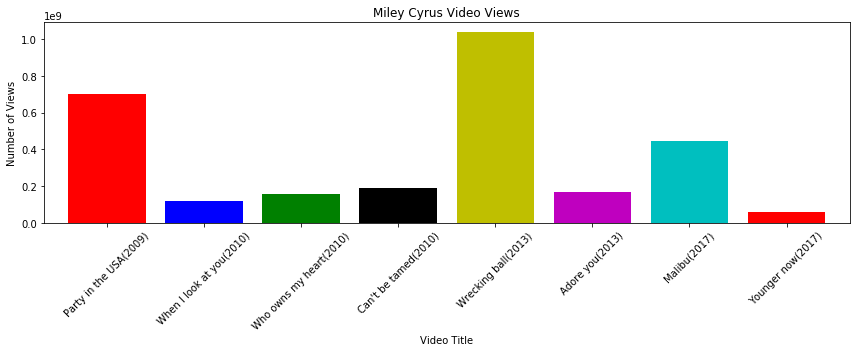

In [99]:
#Create video view graph
ax = view_count_df.plot.bar(x = "Video Title", y = "View Count", color = ['r', 'b', 'g', 'k', 'y', 'm', 'c'], width = 0.8, legend = None, figsize = (12,5))
plt.xticks(rotation = 45)
plt.title("Miley Cyrus Video Views")
plt.ylabel("Number of Views")
plt.tight_layout()
plt.savefig("Miley_Cyrus_Video_Views.png")

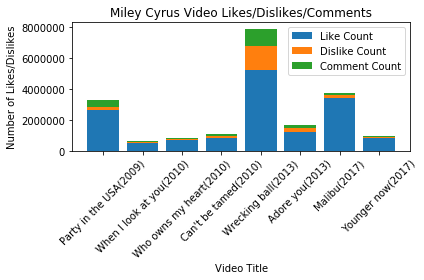

In [101]:
#Create stacked bar graph for likes, dislikes and comments
plt.bar(view_count_df["Video Title"], view_count_df["Like Count"], label = "Like Count")
plt.bar(view_count_df["Video Title"], view_count_df["Dislike Count"], bottom = view_count_df["Like Count"], label = "Dislike Count")
plt.bar(view_count_df["Video Title"], view_count_df["Comment Count"], bottom = view_count_df["Like Count"] + view_count_df["Dislike Count"], label = "Comment Count")
plt.title("Miley Cyrus Video Likes/Dislikes/Comments")
plt.xlabel("Video Title")
plt.ylabel("Number of Likes/Dislikes")
plt.xticks(rotation = 45)
plt.legend()
plt.tight_layout()
plt.savefig("Miley_Cyrus_Video_Likes_Dislikes.png")

